This is to test the function where we add noise to data. 

In [1]:
from utils_parallel_syn_gradient import generate_data_torch
import torch
import matplotlib.pyplot as plt

help(generate_data_torch)

Help on function generate_data_torch in module utils_parallel_syn_gradient:

generate_data_torch(nDimension=10, nSample=100, randomSeed=2, device=device(type='cpu'), distribution: Literal['uniform', 'gaussian'] = 'gaussian')
    Create training data for the parallel synapse model trained with gradient descent algorithm
    
    Inputs:
        nDimension: input dimension
        nSample: number of samples
        randomSeed: random seed
        device: cpu or gpu
        distribution: distribution of the data, either "uniform" or "gaussian"
    Outputs:
        data: torch tensor of shape (nSample, nDimension)
            data is sampled from uniform distribution between 0 and 1
        label: torch tensor of shape (nSample, 1)
            label is -1 for the first half of the samples and 1 for the second half



Here we create sample data

In [2]:
n_dimension = 20
n_sample = 100
ramdom_seed = 0
device = torch.device("cpu")
distribution = "uniform"

data, label = generate_data_torch(
    n_dimension, n_sample, ramdom_seed, device, distribution
)
print("n_dimension:", n_dimension)
print("n_sample:", n_sample)
print("ramdom_seed:", ramdom_seed)
print("device:", device)
print("distribution:", distribution)
print("--------------------------------")
print("data:")
print(data)
print("data.shape:")
print(data.shape)
print("label:   ")
print(label)
print("label.shape:")
print(label.shape)

n_dimension: 20
n_sample: 100
ramdom_seed: 0
device: cpu
distribution: uniform
--------------------------------
data:
tensor([[0.4963, 0.7682, 0.0885,  ..., 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971,  ..., 0.9298, 0.7231, 0.7423],
        [0.5263, 0.2437, 0.5846,  ..., 0.1123, 0.1535, 0.2417],
        ...,
        [0.1123, 0.5086, 0.1838,  ..., 0.3583, 0.3127, 0.8382],
        [0.9601, 0.4789, 0.1475,  ..., 0.9331, 0.4337, 0.2484],
        [0.1158, 0.2062, 0.6444,  ..., 0.5196, 0.3481, 0.8767]])
data.shape:
torch.Size([100, 20])
label:   
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [6]:
def add_noise(data, label, noise_type="uniform", noise_size=0.1, noise_repeat=5):
    """
    Add noise to the data,
    if uniform noise, noise in U(-noise_size, noise_size)
    if gaussian noise, noise in N(0, noise_size)
    """
    noisy_data_all = []
    label_all = []
    for i in range(noise_repeat):
        if noise_type == "uniform":
            noise = torch.rand_like(data) * noise_size
            noise = noise - 0.5 * noise_size

        elif noise_type == "gaussian":
            noise = torch.randn_like(data) * noise_size
        else:
            raise ValueError("Invalid noise type")
        # Ensure noise is within [0, 1] range by reflecting values outside this range
        noisy_data = data + noise
        noisy_data = torch.where(noisy_data < 0, -noisy_data, noisy_data)
        noisy_data = torch.where(noisy_data > 1, 2 - noisy_data, noisy_data)
        noisy_data_all.append(noisy_data)
        label_all.append(label)
    noisy_data_all = torch.cat(noisy_data_all, dim=0)
    label_all = torch.cat(label_all, dim=0)
    return noisy_data_all, label_all


noisy_data:
tensor([[0.5642, 0.7349, 0.0102,  ..., 0.7696, 0.1909, 0.2182],
        [0.7294, 0.8591, 0.4818,  ..., 0.9021, 0.7080, 0.6944],
        [0.5646, 0.2907, 0.6083,  ..., 0.0521, 0.1099, 0.3010],
        ...,
        [0.0999, 0.6014, 0.1725,  ..., 0.3966, 0.2443, 0.8152],
        [0.8611, 0.5500, 0.0943,  ..., 0.9678, 0.5041, 0.1920],
        [0.1279, 0.1229, 0.5591,  ..., 0.6183, 0.3465, 0.8853]])
noisy_data.shape:
torch.Size([500, 20])


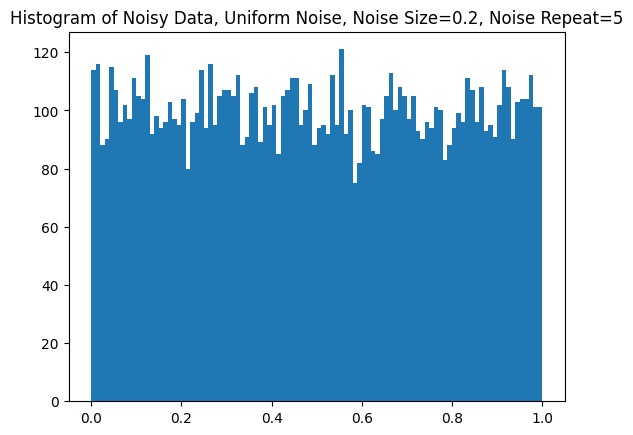

noisy_data:
tensor([[0.4418, 0.7664, 0.1000,  ..., 0.8361, 0.1613, 0.3196],
        [0.7545, 0.9325, 0.3508,  ..., 0.9281, 0.7383, 0.7658],
        [0.5072, 0.2055, 0.6318,  ..., 0.1404, 0.1858, 0.2261],
        ...,
        [0.1477, 0.4637, 0.1810,  ..., 0.3062, 0.3540, 0.9184],
        [0.8575, 0.5231, 0.2300,  ..., 0.9941, 0.4257, 0.2629],
        [0.1029, 0.2391, 0.5985,  ..., 0.5654, 0.3876, 0.8626]])
noisy_data.shape:
torch.Size([500, 20])


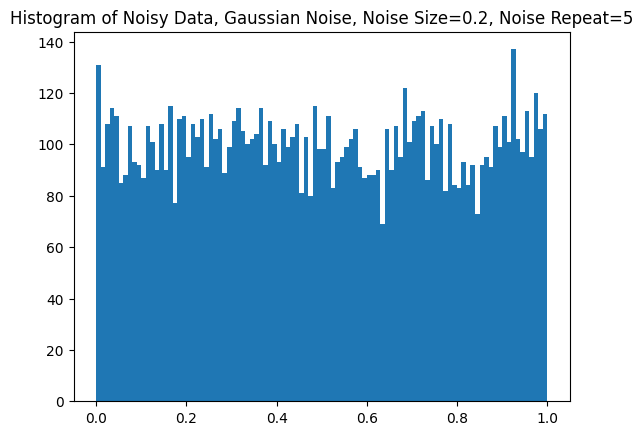

In [8]:
noisy_data, _ = add_noise(
    data, label, noise_type="uniform", noise_size=0.2, noise_repeat=5
)
print("noisy_data:")
print(noisy_data)
print("noisy_data.shape:")
print(noisy_data.shape)

plt.hist(noisy_data.flatten(), bins=100)
plt.title("Histogram of Noisy Data, Uniform Noise, Noise Size=0.2, Noise Repeat=5")
plt.show()

noisy_data, _ = add_noise(
    data, label, noise_type="gaussian", noise_size=0.03, noise_repeat=5
)
print("noisy_data:")
print(noisy_data)
print("noisy_data.shape:")
print(noisy_data.shape)

plt.hist(noisy_data.flatten(), bins=100)
plt.title("Histogram of Noisy Data, Gaussian Noise, Noise Size=0.2, Noise Repeat=5")
plt.show()
